#### The "Heart Disease UCI" dataset contains 14 attributes:

- age: Age of the patient  
- sex: Gender of the patient (1 = male; 0 = female)  
- cp: Chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)  
- trestbps: Resting blood pressure (in mm Hg)  
- chol: Serum cholesterol in mg/dl  
- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  
- restecg: Resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy)  
- thalach: Maximum heart rate achieved  
- exang: Exercise-induced angina (1 = yes; 0 = no)  
- oldpeak: ST depression induced by exercise relative to rest  
- slope: Slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)  
- ca: Number of major vessels (0–3) colored by fluoroscopy  
- thal: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)  
- condition: Diagnosis of heart disease (0 = no disease; 1 = disease)  

#### Project Objectives:

Descriptive Analysis:

- Analyze the distribution of patients' ages and genders.  
- Examine the prevalence of heart disease within the dataset.  
- Investigate the distribution of cholesterol levels and resting blood pressure.  

#### Comparative Analysis:

- Assess the relationship between chest pain types and heart disease occurrence.  
- Evaluate the impact of exercise-induced angina on heart disease prevalence.  
- Analyze the correlation between maximum heart rate achieved and heart disease.  

#### Predictive Modeling:

- Develop a predictive model to identify key risk factors associated with heart disease.  
- Utilize logistic regression and decision tree classifiers to predict heart disease presence.  
- Interactive Visualization:
- Create interactive visualizations to illustrate findings and enhance recruiter engagement.  

### 1. LOADING THE DATA & PREPROCESSING ###

In [170]:
import pandas as pd

In [171]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [172]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

#### 1.1 Inspecting the Data

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


#### 1.2 Check for missing values

In [176]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

#### 1.3 Encoding Categorical Variables

In [178]:
# One-hot encode categorical variables
# We want to convert categorical to numerical
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])

In [179]:
df.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  condition  ...  \
0   69    1       160   234    1      131      0      0.1   1          0  ...   
1   69    0       140   239    0      151      0      1.8   2          0  ...   
2   66    0       150   226    0      114      0      2.6   0          0  ...   
3   65    1       138   282    1      174      0      1.4   1          1  ...   
4   64    1       110   211    0      144      1      1.8   0          0  ...   

    cp_3  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal_0  \
0  False      False      False       True    False     True    False    True   
1  False       True      False      False     True    False    False    True   
2  False       True      False      False    False    False     True    True   
3  False      False      False       True    False     True    False    True   
4  False      False      False       True    False     True    False    True   

   thal_1  thal_2  
0   False   False  
1   False   False  
2   False   False  
3   False   False  
4   False   False  

[5 rows x 23 columns]

In [180]:
# The resulting new columns have boolean values, so we want to convert to integers.

df = df.astype(int)

In [181]:
df.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  condition  ...  \
0   69    1       160   234    1      131      0        0   1          0  ...   
1   69    0       140   239    0      151      0        1   2          0  ...   
2   66    0       150   226    0      114      0        2   0          0  ...   
3   65    1       138   282    1      174      0        1   1          1  ...   
4   64    1       110   211    0      144      1        1   0          0  ...   

   cp_3  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal_0  \
0     0          0          0          1        0        1        0       1   
1     0          1          0          0        1        0        0       1   
2     0          1          0          0        0        0        1       1   
3     0          0          0          1        0        1        0       1   
4     0          0          0          1        0        1        0       1   

   thal_1  thal_2  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 23 columns]

#### 1.4 Feature Scaling

In [183]:
# We want to transform the different features in the dataset (esp. those with large values) so that all the features are on the same scale. 

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
# Initialize the scaler:

scaler = StandardScaler()

In [186]:
# Scale continuous values:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [187]:
df.head()

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  ca  \
0  1.600302    1  1.596266 -0.257179    1 -0.812095      0 -0.723395   1   
1  1.600302    0  0.468418 -0.160859    0  0.061157      0  0.206684   2   
2  1.268242    0  1.032342 -0.411292    0 -1.554358      0  1.136764   0   
3  1.157555    1  0.355633  0.667499    1  1.065396      0  0.206684   1   
4  1.046868    1 -1.223355 -0.700254    0 -0.244481      1  0.206684   0   

   condition  ...  cp_3  restecg_0  restecg_1  restecg_2  slope_0  slope_1  \
0          0  ...     0          0          0          1        0        1   
1          0  ...     0          1          0          0        1        0   
2          0  ...     0          1          0          0        0        0   
3          1  ...     0          0          0          1        0        1   
4          0  ...     0          0          0          1        0        1   

   slope_2  thal_0  thal_1  thal_2  
0        0       1       0       0  
1        0       1       0       0  
2        1       1       0       0  
3        0       1       0       0  
4        0       1       0       0  

[5 rows x 23 columns]

### 2. EXPLORATORY DATA ANALYSIS (EDA) 

#### 2.1 Age Distribution Histogram

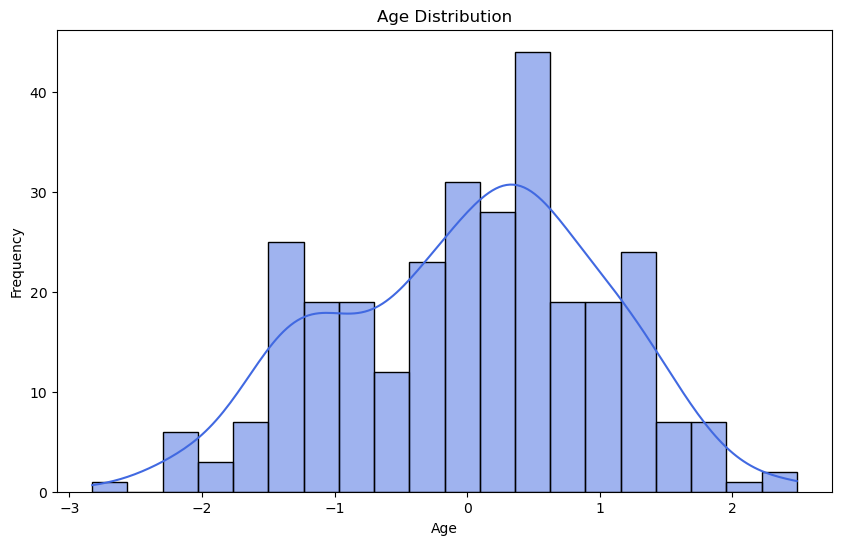

None

In [190]:
# Show how age is distributed among patients.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20, kde=True, color='royalblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
display(plt.show())

Age Distribution  
- Central Tendency (Most Common Age Group):   
    - Most of the patients fall in the 50-60 age range, but there is also a slight peak in the early 40's age group.  
- Spread (How Diverse the Ages Are)  
    - Since the spread of age group frequency is wide, we can say that the there is a broad range of age groups in the dataset.  
- Symmetry vs. Skewness:
    - Normal, or bell-shaped, since there is an equal amount of young and old patients.  
- Outliers(isolated bars):  
    - There is one isolated bar in the 30's age group. This indicates a rare age group in the dataset.

#### 2.1 Gender Distribution Pie Chart

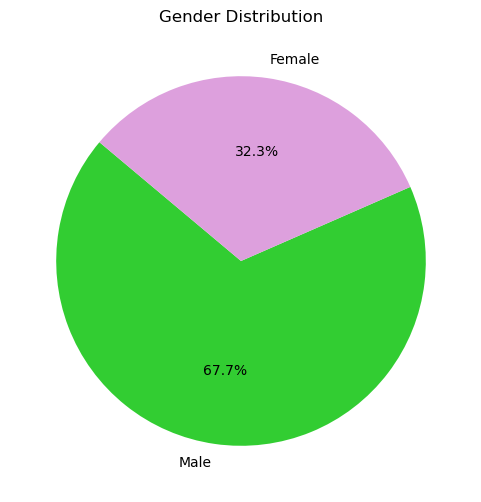

None

In [193]:
# Let's look at the proportion of males vs. females in the dataset.

gender_counts = df['sex'].value_counts()
labels = ['Male', 'Female']

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['limegreen', 'plum'])
plt.title('Gender Distribution')
display(plt.show())

#### 2.3 Heart Disease Prevalence Bar Chart

C:\Users\amnee\AppData\Local\Temp\ipykernel_9292\1411464462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

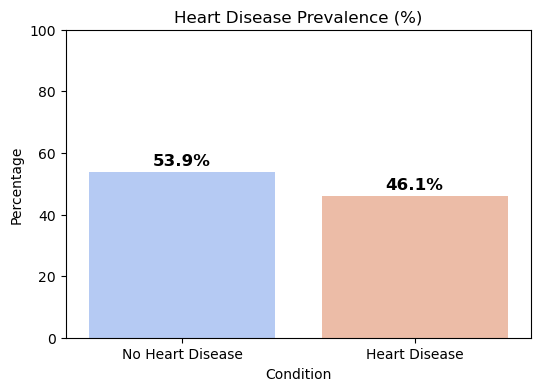

In [195]:
# The perentage of patients with and without heart disease.

heart_disease_counts = df['condition'].value_counts(normalize=True) * 100 # convert to percentage
plt.figure(figsize=(6, 4))
sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette='coolwarm')
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.title('Heart Disease Prevalence (%)')
plt.ylabel('Percentage')
plt.xlabel('Condition')
plt.ylim(0,100) # ensures y-axis is in percentage range

#Display values on bars
for index, value in enumerate(heart_disease_counts.values):
    plt.text(index, value + 2, f"{value:.1f}%", ha='center', fontsize=12, fontweight='bold')
plt.show

### 3. COMPARATIVE ANALYSIS VISUALIZATIONS
#### Relationships between different risk factors.

#### 3.1 Chest Pain Type vs. Heart Disease - Stacked Bar Chart

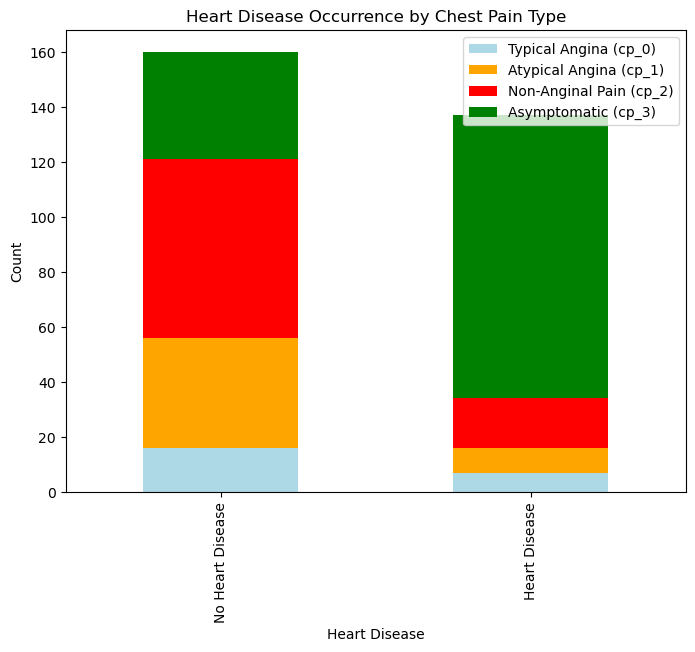

In [204]:
# Understanding which chest pain type correlates with heart disease

import matplotlib.pyplot as plt
import pandas as pd

# Create a crosstab for chest pain type and heart disease
cp_heart_disease_ct = df.groupby('condition')[['cp_0', 'cp_1', 'cp_2', 'cp_3']].sum()

# Plot stacked bar chart
cp_heart_disease_ct.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'orange', 'red', 'green'])

# Customize chart
plt.title('Heart Disease Occurrence by Chest Pain Type')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(['Typical Angina (cp_0)', 'Atypical Angina (cp_1)', 'Non-Anginal Pain (cp_2)', 'Asymptomatic (cp_3)'])
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()


Bar chart overview:
- This bar illustrates the relationship between chest pain type (cp) and the precense of heart disease.  
- Because the majority of patients with heart disease experience asymptomatic heart disease, we can say asymptomatic chest pain may be a major risk factor for heart disease.  
- Typical angina is more common in people without heart disease. This indicates that while typical angina is common, it is not necessarily a strong predictor of heart disease.
- Patients with Atypical Angina (cp_1) and Non-Anginal Pain (cp_2) are more common in patients who do not have heart disease. This suggests that these types of chest pain are not nececessarily strong predictors of heart disease - many patients with atypical or non-anginal chest pain do not actually have the condition.  

#### 3.2 Maximum Heart Rate vs. Heart Disease (Boxplot)

C:\Users\amnee\AppData\Local\Temp\ipykernel_9292\1426770597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['condition'], y=df['thalach'], palette='coolwarm')


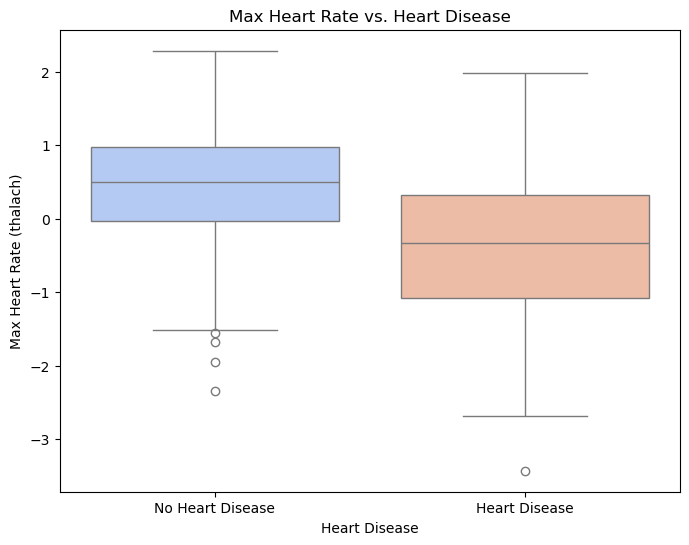

In [211]:
# Compare heart rate levels between patients with and without heart disease.

plt.figure(figsize=(8,6))
sns.boxplot(x=df['condition'], y=df['thalach'], palette='coolwarm')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.title('Max Heart Rate vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()

Boxplot Overview: We are summarizing the distribution of date through four key statistical components: the median, interquartile range (IQR), whiskers, and outliers.  
- Median: The median max heart rate for patients with heart disease is lower than that of patients without heart disease. This suggests that people with heart disease tend to reach a lower max heart rate during physical exertion.  
- Spread: The IQR is greater for patients with heart disease than for those without. This means that the range of middle 50% of heart values is wider in heart disease patients.  
    - This shows that heart disease patients show more diverse heart rate responses.  
    - Some heart disease patients might still achieve high heart rates, while others might have severely resitricted cardiovascular function.  
    - Patients without heart disease may have more uniform heart rate responses, leading to a smaller spread.



### 4. Correlation and Predictive Analysis Visualizations
#### Identify patterns and relationships between different variables.

#### 4.1: Strongest Risk Factors for Heart Disease - Heatmap

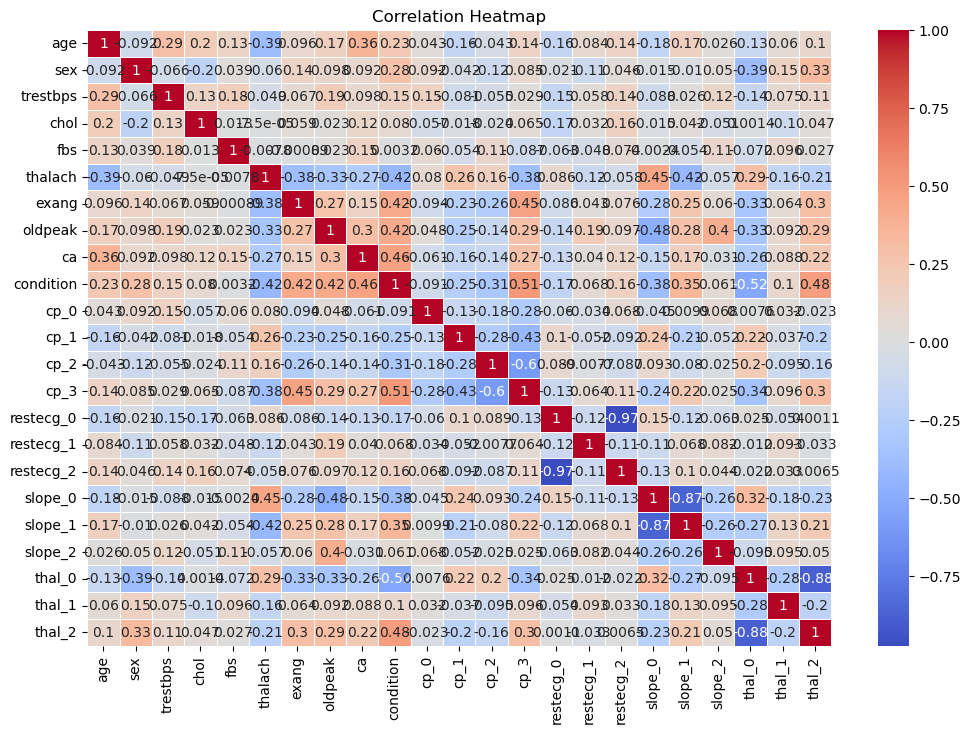

In [223]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Heatmap Overview: Most Important Predictors of Heart Disease:  
- Thalassema: thal, -0.52  
- Asymptomatic chest pain: cp_3, 0.51  
- Thalassemia(reversable defect): thal_2, 0.48  
- Number of major blood vessels: ca, 0.46  
- Exercise Induced Angina: exang, 0.42  
- Oldpeak (ST depression after excercise): 0.42  
- Max Heart Rate Achieved: thalach, -0.42

#### 4.2 ROC Curve for Predictive Model

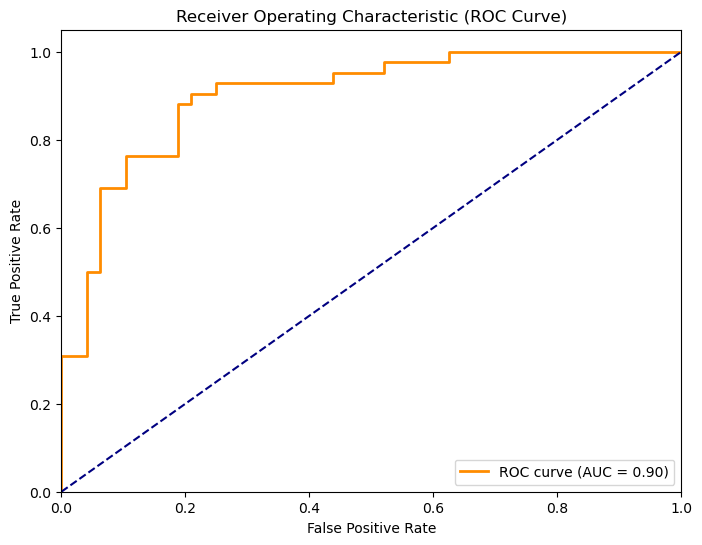

ROC Overview:  
- Since AUC = 0.90, the model is very good at predicting whether a patient has heart disease.  
- This suggests that risk factors in the dataset are strongly correlated with heart disease.  
- A higher TPR and lower FPR indicate the model is effective at detecting actual cases of heart disease while minimizing false positives.

### 5. Interactive Visualizations Using Plotly

#### 5.1: Age vs. Max Heart Rate - Interactive Scatterplot

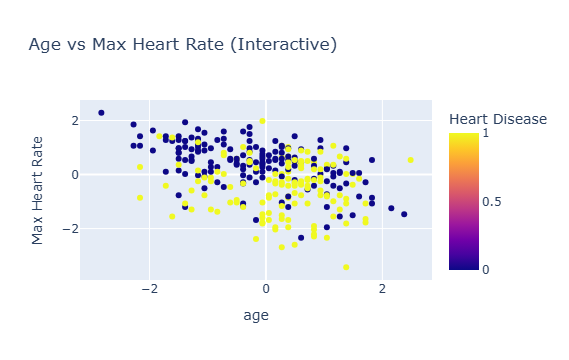

In [239]:
import plotly.express as px

fig = px.scatter(df, x='age', y='thalach', color='condition', 
                 title='Age vs Max Heart Rate (Interactive)',
                 labels={'thalach': 'Max Heart Rate', 'condition': 'Heart Disease'})
fig.show()

#### 5.2 Interactive Parallel Categories Chart for Risk Factors

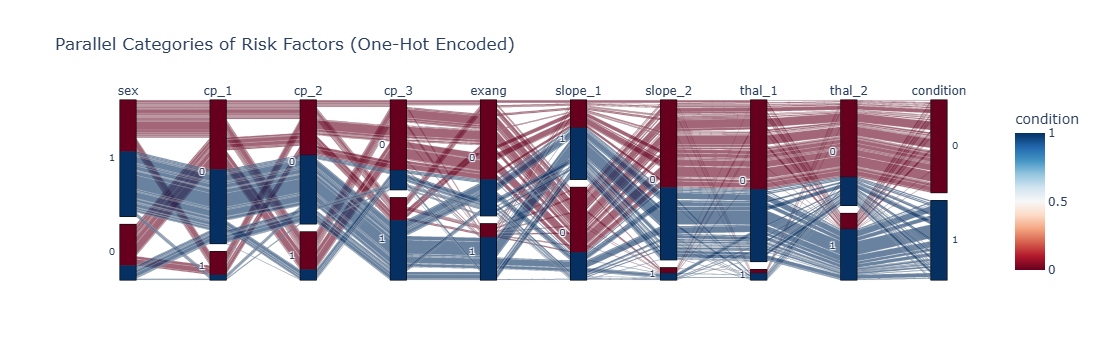

In [252]:
import plotly.express as px

# Define the correct one-hot encoded dimensions
dimensions = ['sex', 'cp_1', 'cp_2', 'cp_3', 'exang', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'condition']

# Create the interactive parallel categories diagram
fig = px.parallel_categories(df, 
    dimensions=dimensions,
    title='Parallel Categories of Risk Factors (One-Hot Encoded)',
    color=df['condition'],
    color_continuous_scale=px.colors.sequential.RdBu
)

fig.show()



Categories Chart Overview:  
- 1. Males vs. Females & Heart Disease Trends  
    - If you follow the leftmost column (sex), you’ll see that more males (1) than females (0) have heart disease (target=1).  
    - This suggests males may have a higher risk of heart disease in this dataset.  
- 2. Chest Pain Type & Risk  
    - Chest pain (cp_1, cp_2, cp_3) is a major indicator of heart disease.  
    - If you follow cp_3 (asymptomatic chest pain), you’ll likely see a higher proportion of people in the heart disease group (target=1).  
    - This aligns with medical research that asymptomatic chest pain is a warning sign of severe heart issues.  
- 3. Exercise-Induced Angina (exang) & Heart Disease  
    - exang=1 (people who experience angina during exercise) tend to have a higher risk of heart disease.  
    - If you trace people who have exang=1, you’ll likely see that a larger percentage end up in the target=1 category.  